In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

%matplotlib inline

In [37]:
cf.go_offline()

In [38]:
train=pd.read_csv('titanic_train.csv')

In [39]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

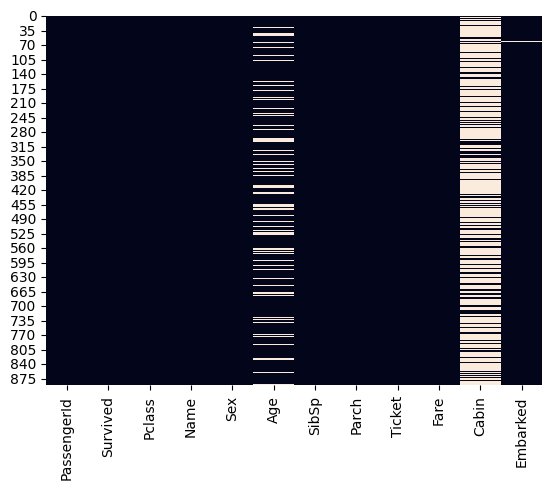

In [41]:
sns.heatmap(train.isnull(),cbar=False)

<Axes: xlabel='Age', ylabel='Count'>

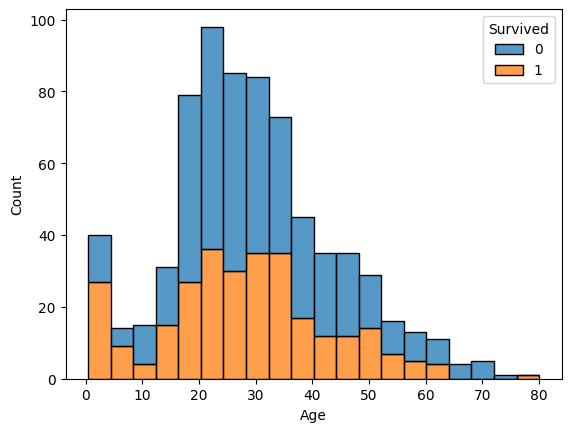

In [42]:
sns.histplot(data=train,x='Age',hue='Survived',multiple='stack')

In [43]:
fig=px.histogram(train,x='Age',color='Survived')
fig.update_layout(bargap=0.1,barmode='stack')

In [44]:
train['Fare'].iplot(kind='hist')

# data cleaning

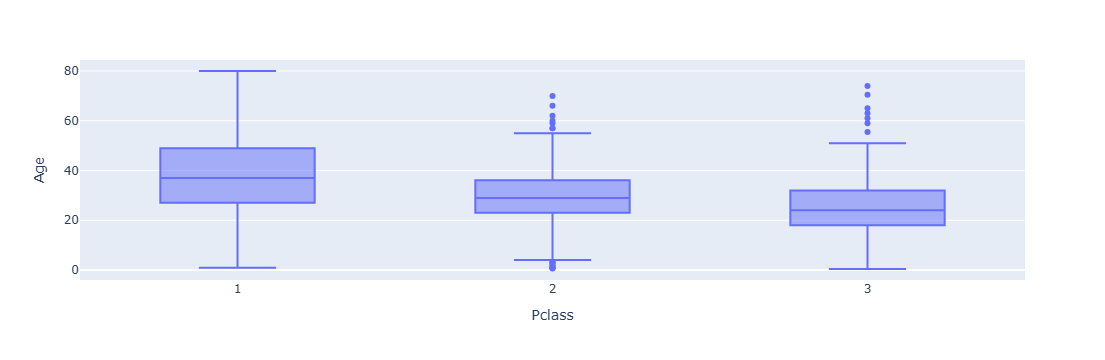

In [45]:
px.box(train,y='Age',x='Pclass')

In [46]:
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

       if Pclass == 1:
        return 37
        
       elif Pclass == 2:
        return 29

       elif Pclass == 3:
        return 24

       else:
        return Age


    

In [47]:
train['Age']=train[['Age','Pclass']].apply(inpute_age,axis=1)

C:\Users\sharm\AppData\Local\Temp\ipykernel_11244\2203733626.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sharm\AppData\Local\Temp\ipykernel_11244\2203733626.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

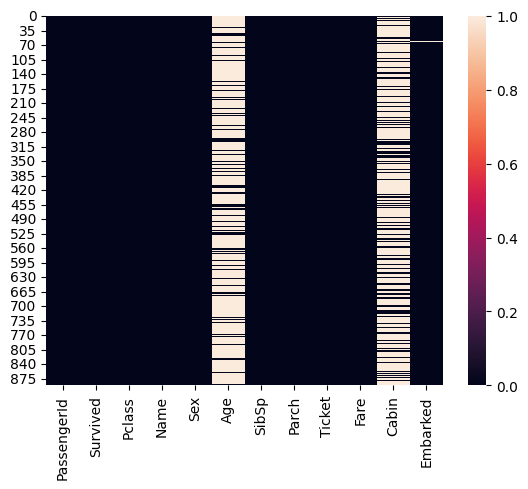

In [48]:
sns.heatmap(train.isnull())

In [49]:
train.drop('Cabin',axis=1,inplace=True)

In [50]:
train.dropna(inplace=True)

In [51]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)


In [52]:
# Optionally convert to integer
sex = sex.astype(int)
embark = embark.astype(int)

In [53]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [54]:
train=pd.concat([train,sex,embark],axis=1)

In [55]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,6,0,3,24.0,0,0,8.4583,1,1,0
17,18,1,2,29.0,0,0,13.0000,1,0,1
19,20,1,3,24.0,0,0,7.2250,0,0,0
26,27,0,3,24.0,0,0,7.2250,1,0,0
28,29,1,3,24.0,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,24.0,0,0,7.2292,1,0,0
863,864,0,3,24.0,8,2,69.5500,0,0,1
868,869,0,3,24.0,0,0,9.5000,1,0,1
878,879,0,3,24.0,0,0,7.8958,1,0,1


In [56]:
train.drop('PassengerId',axis=1,inplace=True)

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,0,3,24.0,0,0,8.4583,1,1,0
17,1,2,29.0,0,0,13.0000,1,0,1
19,1,3,24.0,0,0,7.2250,0,0,0
26,0,3,24.0,0,0,7.2250,1,0,0
28,1,3,24.0,0,0,7.8792,0,1,0


In [58]:
embark

,Q,S
5,1,0
17,0,1
19,0,0
26,0,0
28,1,0
...,...,...
859,0,0
863,0,1
868,0,1
878,0,1


# Logistic Reg

In [59]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lm=LogisticRegression(max_iter=100)

In [64]:
lm.fit(X_train,y_train)

C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [65]:
predictions=lm.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.80      0.62      0.70        13

    accuracy                           0.87        54
   macro avg       0.84      0.78      0.81        54
weighted avg       0.87      0.87      0.86        54



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test,predictions)

array([[39,  2],
       [ 5,  8]], dtype=int64)